### Download the data and remove rows containing null values

In [1]:
# modules.data_module is a module we have created ourselves for useful data functions
import modules.data_module as dm
import pandas as pd

data_url = "https://corgis-edu.github.io/corgis/datasets/csv/graduates/graduates.csv"
data_path = "data/graduates.csv"

# Used to download and save for the first time
# dm.retrieve_data(data_url, save_to_file=True, save_path="data/graduates.csv")

data = dm.retrieve_data(data_path).set_index("Unnamed: 0")
data.index.name = "ID"

data

# Keep columns that are of interest.
data = data[["Demographics.Total", "Year", "Salaries.Mean", "Education.Major", "Demographics.Ethnicity.Asians", "Demographics.Ethnicity.Minorities", "Demographics.Ethnicity.Whites", "Demographics.Gender.Females", "Demographics.Gender.Males"]]

# Remove all rows where any column in the row has a value of 0
data = data[(data != 0).all(1)]

# Remove all rows where column not equal to 1993 as 1993 was before the Dotcom Bubble from 1995-2001.
# As we don't have more data before 1993, it wouldn't make sense to use that data as we don't know if the values
# were at peak, lower or the same before then.
data = (data[data['Year'] != 1993])
# The above causes decimals on Year. Let's get rid of those (so our plot doesnt show decimal years)
data['Year'] = data['Year'].astype(str).replace('\.0', '', regex=True)

# Remove all rows where Education.Major is not: 
# "Biological Sciences", "Chemical Engineering", "Chemistry", "Civil Engineering", "Computer Science and Math",
# "Economics", "Electrical Engineering", "Management & Administration", "Mechanical Engineering", "Other Engineering"
# "Physics and Astronomy" or "Psychology"
majors_of_interest = ["Biological Sciences", "Chemical Engineering", "Chemistry", "Civil Engineering", 
                      "Computer Science and Math", "Economics", "Electrical Engineering", "Management & Administration", 
                      "Mechanical Engineering", "Other Engineering","Physics and Astronomy", "Psychology"]
data = data.loc[data['Education.Major'].isin(majors_of_interest)]

data

,Demographics.Total,Year,Salaries.Mean,Education.Major,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males
ID,,,,,,,,,
47,1338108,1995,54523.54,Biological Sciences,92708,119813,1123768,579614,758494
48,217727,1995,58896.72,Chemical Engineering,29745,12644,175338,33731,183996
49,507228,1995,60697.60,Chemistry,49393,36562,421046,140363,366865
50,345038,1995,51758.63,Civil Engineering,39586,18806,286397,24979,320059
51,1114519,1995,49672.61,Computer Science and Math,87310,103423,923026,401758,712760
...,...,...,...,...,...,...,...,...,...
485,1154661,2015,109173.61,Electrical Engineering,375520,155870,623271,149404,1005257
496,950566,2015,98533.83,Mechanical Engineering,184209,117901,648456,96727,853839
503,1306845,2015,96287.14,Other Engineering,235954,228427,842463,266635,1040210


### Plot Salaries.Mean for the majors of interest

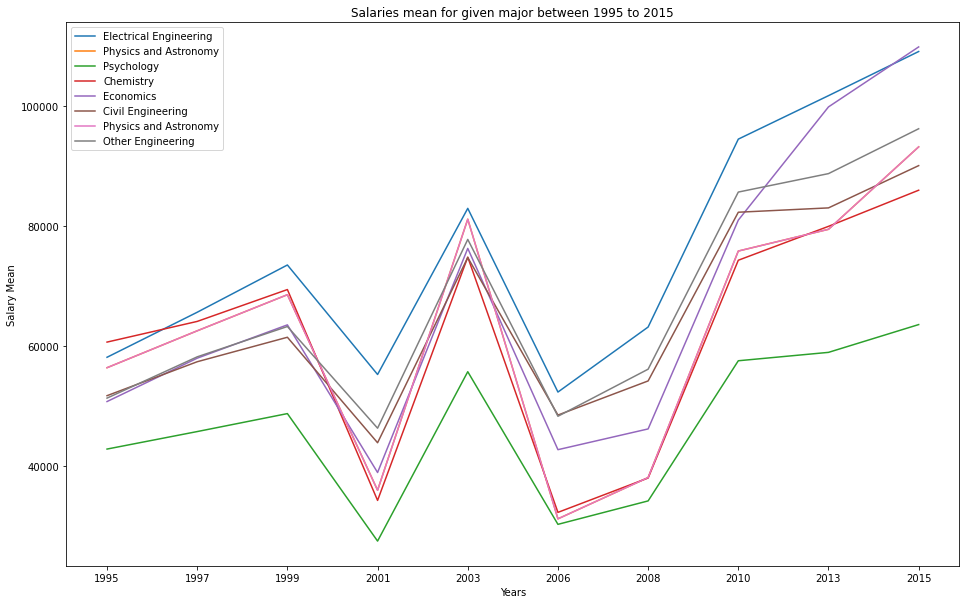

In [2]:
# smp = salary mean plot
smp_data = data
smp_label = "Education.Major"
smp_x = "Year"
smp_y = "Salaries.Mean"
smp_xlabel = "Years"
smp_ylabel = "Salary Mean"
smp_labels = ["Electrical Engineering", "Physics and Astronomy", "Psychology", "Chemistry", "Economics", "Civil Engineering", "Physics and Astronomy", "Other Engineering"]
smp_title = "Salaries mean for given major between 1995 to 2015"

dm.plot_data(smp_data, smp_label, smp_x, smp_y, smp_xlabel, smp_ylabel, smp_labels, smp_title)

### Observations on the Salary graph for given majors between 1995 to 2015
We can see that certain educations are rising in salary since the start (1995) and up to the end year (2015), such as Electrical Engineering. It could indicate that it has been highly demanded throughout all the years, hence the salary increase.
On the other hand, the salary of the majority of the educations appears to be affected by financial crisis that begun in early 2007. Because of that, most of the educations had a high decrease in the salary during this period, which is also shown on the graph above. But after the financial crisis ending in 2009, the majority of the educations, such as Chemistry, Computer Science and Chemical Engineering are now at a higher salary level than before the crisis.

- Note til os: Lav nogle overordnede konklusioner når vi har de andre grafer med og få den røde tråd frem. Ovenstående er blot "åbenlyse" observationer.

### Plot Demographics.Ethnicity for the majors of interest

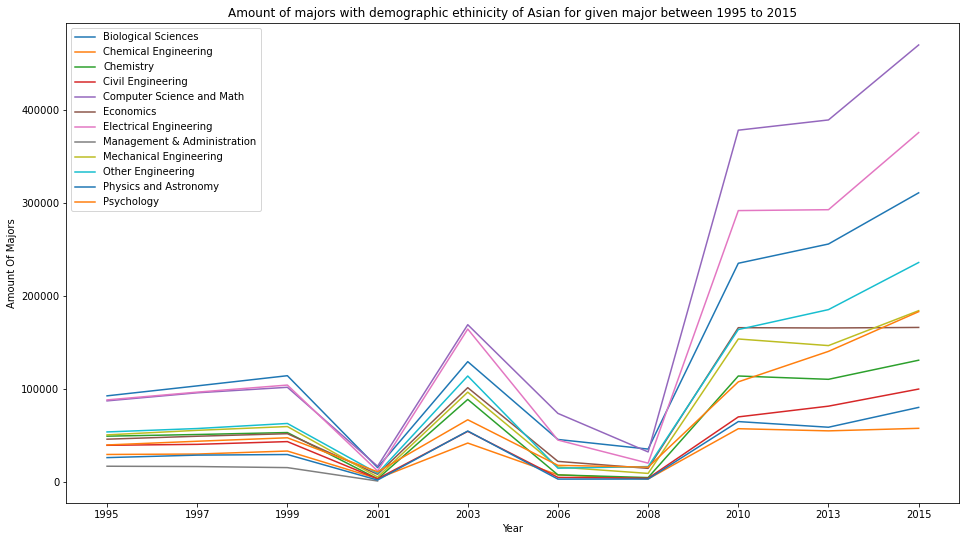

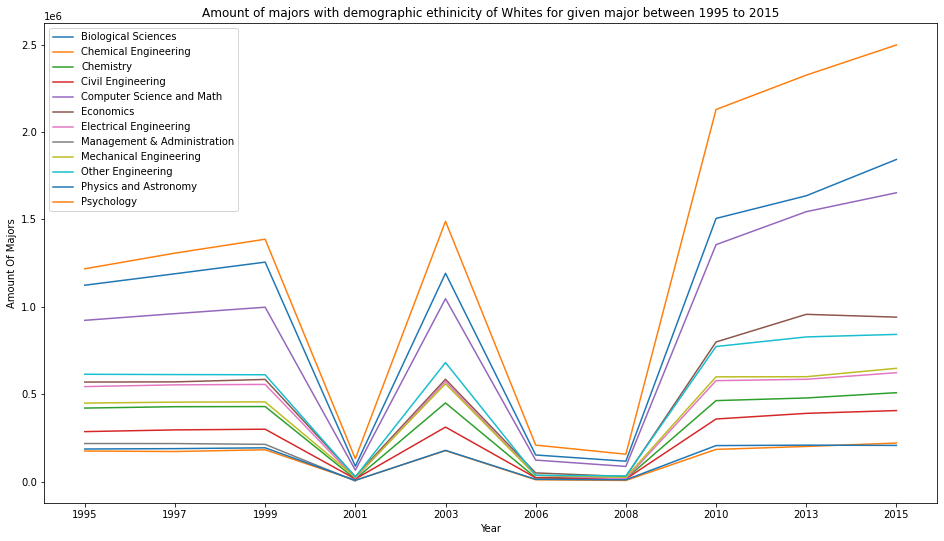

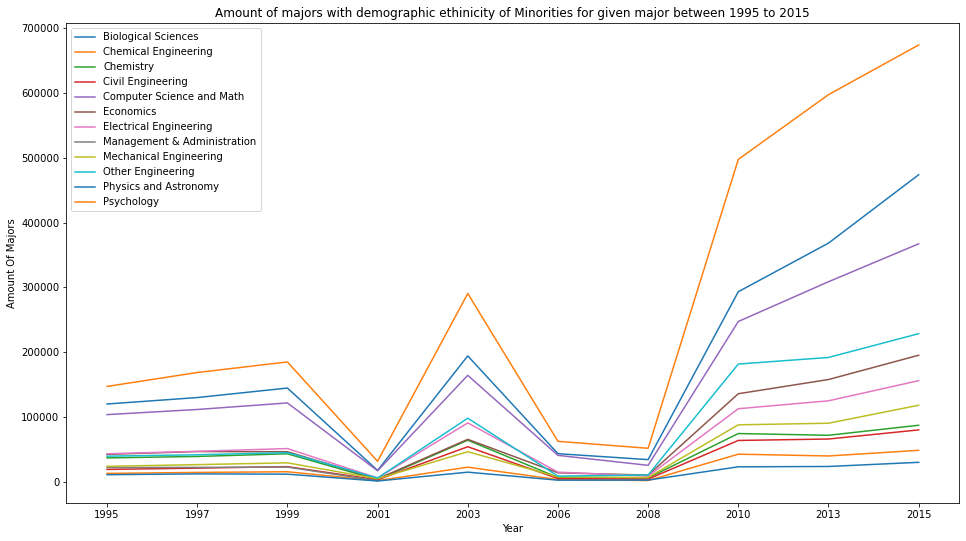

In [3]:
deap_data = data
deap_label = ["Education.Major", "Education.Major", "Education.Major"]
deap_x = ["Year", "Year", "Year"]
deap_y = ["Demographics.Ethnicity.Asians", "Demographics.Ethnicity.Whites", "Demographics.Ethnicity.Minorities"]
deap_xlabel = ["Year", "Year", "Year"]
deap_ylabel = ["Amount Of Majors", "Amount Of Majors",  "Amount Of Majors"]
deap_labels = majors_of_interest
deap_title = ["Amount of majors with demographic ethinicity of Asian for given major between 1995 to 2015",
              "Amount of majors with demographic ethinicity of Whites for given major between 1995 to 2015", 
              "Amount of majors with demographic ethinicity of Minorities for given major between 1995 to 2015"]

dm.plot_data(deap_data, deap_label, deap_x, deap_y, deap_xlabel, deap_ylabel, deap_labels, deap_title, 3)

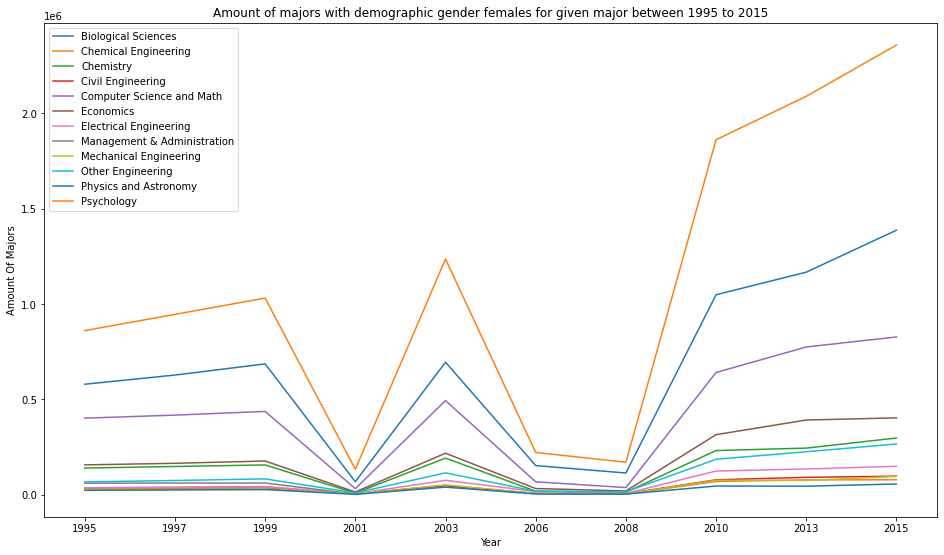

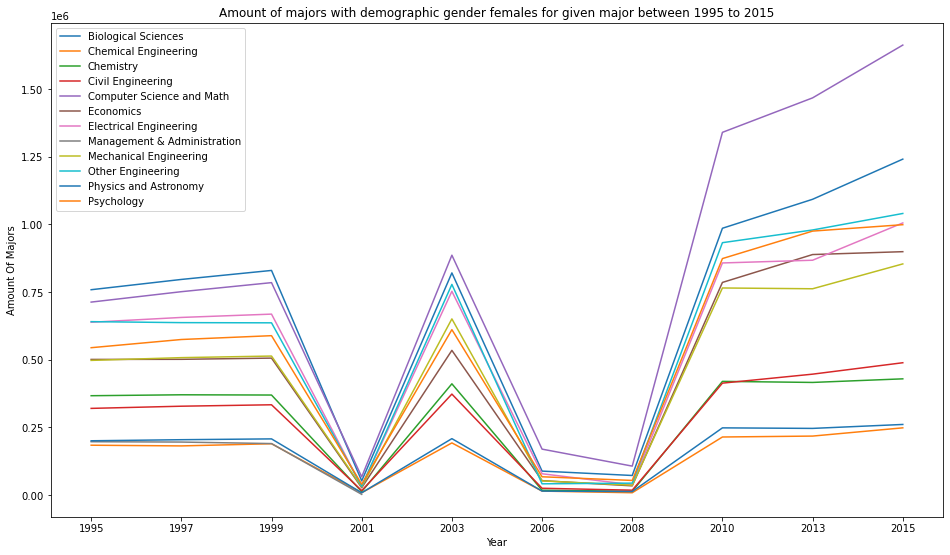

In [4]:
# dgfp = demographics gender female plot
dgfp_data = data
dgfp_label = ["Education.Major", "Education.Major"]
dgfp_x = ["Year", "Year"]
dgfp_y = ["Demographics.Gender.Females", "Demographics.Gender.Males"]
dgfp_xlabel = ["Year", "Year"]
dgfp_ylabel = ["Amount Of Majors", "Amount Of Majors"]
dgfp_labels = majors_of_interest
dgfp_title = ["Amount of majors with demographic gender females for given major between 1995 to 2015", 
              "Amount of majors with demographic gender females for given major between 1995 to 2015"]

dm.plot_data(dgfp_data, dgfp_label, dgfp_x, dgfp_y, dgfp_xlabel, dgfp_ylabel, dgfp_labels, dgfp_title, 2)

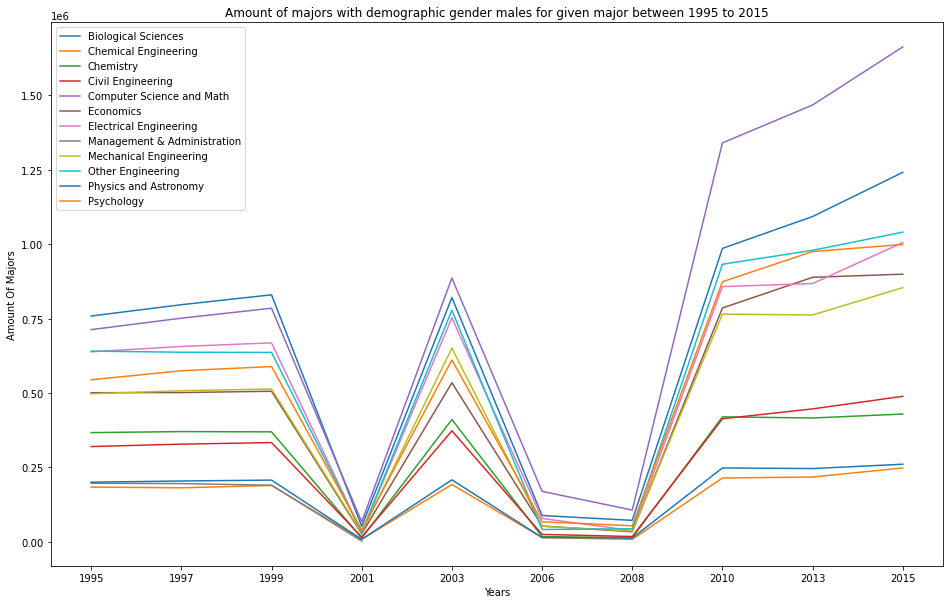

In [5]:
# dgmp = demographics gender m plot
dgmp_data = data
dgmp_label = "Education.Major"
dgmp_x = "Year"
dgmp_y = "Demographics.Gender.Males"
dgmp_xlabel = "Years"
dgmp_ylabel = "Amount Of Majors"
dgmp_labels = majors_of_interest
dgmp_title = "Amount of majors with demographic gender males for given major between 1995 to 2015"

dm.plot_data(dgmp_data, dgmp_label, dgmp_x, dgmp_y, dgmp_xlabel, dgmp_ylabel, dgmp_labels, dgmp_title)

### Clustering of Data through Meanshift

In [6]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

print(estimate_bandwidth(meanshift_data_scaled))

analyzer = MeanShift(bandwidth=2.26) #We will provide only bandwith in hyperparameter . The smaller values of bandwith result in tall skinny kernels & larger values result in short fat kernels.
#We found the bandwith using the estimate_bandiwth function mentioned in below cell.
analyzer.fit(meanshift_data_scaled)
import numpy as np 

#Below is a helper function to help estimate a good value for bandwith based on the data.
"""from sklearn.cluster import estimate_bandwith
estimate_bandwith(meanshift_data)"""   #This runs in quadratic time hence take a long time
'from sklearn.cluster import estimate_bandwith\nestimate_bandwith(meanshift_data)'
labels = analyzer.labels_
np.unique(labels)
print(labels)
print('\n\n',np.unique(labels))

Number of estimated clusters : 9


In [12]:

#We will add a new column in dataset which shows the cluster the data of a particular row belongs to.
meanshift_data_scaled['cluster_group'] = np.nan
data_length=len(meanshift_data_scaled)
for i in range(data_length):
    meanshift_data_scaled.iloc[i,meanshift_data_scaled.columns.get_loc('cluster_group')] = labels[i]
meanshift_data_scaled


,Salaries.Mean,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major,cluster_group
0,0.327788,0.191677,0.174847,0.447451,0.244711,0.452102,0,0.0
1,0.380835,0.056658,0.015392,0.066148,0.012733,0.103858,1,0.0
2,0.402679,0.098792,0.050979,0.164931,0.058047,0.214708,2,0.0
3,0.294250,0.077761,0.024561,0.110798,0.009013,0.186336,3,0.0
4,0.268946,0.180102,0.150461,0.366745,0.169130,0.424379,4,0.0
...,...,...,...,...,...,...,...,...
92,0.990692,0.798147,0.228496,0.246233,0.061889,0.601682,6,1.0
93,0.861632,0.387895,0.172002,0.256358,0.039503,0.509897,8,1.0
94,0.834379,0.498858,0.336452,0.334356,0.111708,0.622870,9,2.0
95,0.797746,0.165076,0.040808,0.079066,0.022540,0.150348,10,2.0


In [13]:
analyzer = MeanShift(bandwidth=2.26)
#We found the bandwith (2.26) using the estimate_bandiwth function
analyzer.fit(meanshift_data_scaled)

ms = analyzer

ms.fit(meanshift_data_scaled)
labels_data = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels_data)
n_clusters = len(labels_unique)

print('Number of estimated clusters : {}'.format(n_clusters))

Number of estimated clusters : 3


In [14]:
#Grouping passengers by Cluster
meanshift_data_scaled_clusters = meanshift_data_scaled.copy()
meanshift_data_scaled_clusters = meanshift_data_scaled.groupby(['cluster_group']).mean()
#Count of passengers in each cluster
meanshift_data_scaled_clusters['Counts'] = pd.Series(meanshift_data_scaled.groupby(['cluster_group']).size())
meanshift_data_scaled_clusters

,Salaries.Mean,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,Demographics.Gender.Females,Demographics.Gender.Males,Education.Major,Counts
cluster_group,,,,,,,,
0.0,0.475213,0.206450,0.136176,0.229284,0.116753,0.293090,2.471698,53
1.0,0.588352,0.271744,0.093837,0.195114,0.027905,0.369505,7.000000,17
2.0,0.401900,0.145456,0.198874,0.282468,0.190805,0.275922,10.037037,27


In [15]:
# Implementing Cluster with two features (Salary + Major)
meanshift_data_2 = data[["Salaries.Mean", "Education.Major"]]
meanshift_data_2.head()

# Start with normalization parts for Mean, and fit for Major.

le2=preprocessing.LabelEncoder()

meanshift_major_2 = data[["Education.Major"]].copy()

meanshift_major_2['Education.Major'] = le2.fit_transform(meanshift_major_2['Education.Major'].astype(str))
meanshift_major_2.head()

meanshift_2_except_major = meanshift_data_2.copy()
meanshift_2_except_major = meanshift_2_except_major.drop(["Education.Major"], axis=1);


major_list = meanshift_major_2['Education.Major'].to_list()
## Normalization
scaler = preprocessing.MinMaxScaler()
names = meanshift_2_except_major.columns
d = scaler.fit_transform(meanshift_2_except_major)
scaled_meanshift_2_except_major = pd.DataFrame(d, columns=names)

meanshift_data_scaled_2 = scaled_meanshift_2_except_major.copy()
meanshift_data_scaled_2['Education.Major'] = major_list
meanshift_data_scaled_2.head()


# Meanshift proceed..
print(estimate_bandwidth(meanshift_data_scaled_2))

analyzer = MeanShift(bandwidth=2.21) #We will provide only bandwith in hyperparameter . The smaller values of bandwith result in tall skinny kernels & larger values result in short fat kernels.
#We found the bandwith using the estimate_bandiwth function mentioned in below cell.
analyzer.fit(meanshift_data_scaled)
import numpy as np 

#Below is a helper function to help estimate a good value for bandwith based on the data.
"""from sklearn.cluster import estimate_bandwith
estimate_bandwith(meanshift_data)"""   #This runs in quadratic time hence take a long time
'from sklearn.cluster import estimate_bandwith\nestimate_bandwith(meanshift_data)'
labels2 = analyzer.labels_
np.unique(labels2)
print(labels2)
print('\n\n',np.unique(labels2))



2.2155563970437244
[0 0 0 0 0 2 2 2 2 1 1 1 0 0 0 0 0 2 2 2 2 1 1 1 0 0 0 0 0 2 2 2 2 1 1 1 0
 1 1 0 0 0 0 0 2 2 2 1 1 1 0 0 0 0 2 1 1 0 0 0 0 2 1 1 0 0 0 0 0 2 2 2 1 1
 1 0 0 0 0 0 2 2 2 1 1 1 0 0 0 0 0 2 2 2 1 1 1]


 [0 1 2]


In [16]:
#We will add a new column in dataset which shows the cluster the data of a particular row belongs to.
meanshift_data_scaled_2['cluster_group'] = np.nan
data_length=len(meanshift_data_scaled_2)
for i in range(data_length):
    meanshift_data_scaled_2.iloc[i,meanshift_data_scaled_2.columns.get_loc('cluster_group')] = labels[i]
meanshift_data_scaled_2

,Salaries.Mean,Education.Major,cluster_group
0,0.327788,0,0.0
1,0.380835,1,0.0
2,0.402679,2,0.0
3,0.294250,3,0.0
4,0.268946,4,0.0
...,...,...,...
92,0.990692,6,1.0
93,0.861632,8,1.0
94,0.834379,9,2.0
95,0.797746,10,2.0


In [17]:
# Calculate amount of clusters
analyzer = MeanShift(bandwidth=2.26)
#We found the bandwith (2.26) using the estimate_bandiwth function
analyzer.fit(meanshift_data_scaled)

ms = analyzer

ms.fit(data.drop('Education.Major', axis=1))
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print('Number of estimated clusters : {}'.format(n_clusters))

Number of estimated clusters : 3


In [18]:
#Grouping passengers by Cluster
meanshift_data_scaled_clusters_2 = meanshift_data_scaled_2.copy()
meanshift_data_scaled_clusters_2 = meanshift_data_scaled_2.groupby(['cluster_group']).mean()
#Count of passengers in each cluster
meanshift_data_scaled_clusters_2['Counts'] = pd.Series(meanshift_data_scaled_2.groupby(['cluster_group']).size())
meanshift_data_scaled_clusters_2

,Salaries.Mean,Education.Major,Counts
cluster_group,,,
0.0,0.475213,2.471698,53
1.0,0.588352,7.000000,17
2.0,0.401900,10.037037,27


### Prediction

In [19]:
mean_biological = data[(data["Education.Major"] == 'Computer Science and Math')]
# car_reduced_make_fuel_df = car_data_df[(car_data_df[make] == 'Honda') & (car_data_df[fuel_type] == 'Gasoline')]

mean_biological.head()

,Year,Demographics.Total,Education.Major,Salaries.Mean,Salaries.Median,Salaries.Quantity,Salaries.Standard Deviation,Demographics.Ethnicity.Asians,Demographics.Ethnicity.Minorities,Demographics.Ethnicity.Whites,...,Employment.Work Activity.Design,Employment.Work Activity.Development,Employment.Work Activity.Human Resources,Employment.Work Activity.Managing/Supervising People/Projects,Employment.Work Activity.Other,Employment.Work Activity.Productions/Operations/Maintenance,Employment.Work Activity.Professional Service,Employment.Work Activity.Qualitity/Productivity Management,"Employment.Work Activity.Sales, Purchasing, Marketing",Employment.Work Activity.Teaching
ID,,,,,,,,,,,,,,,,,,,,,
51,1995,1114519,Computer Science and Math,49672.61,47000.0,8079,27110.39,87310,103423,923026,...,282449,208889,292120,426032,75539,69947,133434,226475,260939,236202
98,1997,1168978,Computer Science and Math,56385.76,53000.0,7821,29081.30,95989,111345,961216,...,292690,193886,305420,451602,61171,53563,139985,204129,254630,238368
145,1999,1221788,Computer Science and Math,62377.24,60000.0,6924,31639.62,101897,121467,997899,...,293973,209693,334215,498729,43811,61670,144105,225487,264528,237708
246,2003,1379971,Computer Science and Math,74335.41,73000.0,4815,33457.39,169137,164110,1046724,...,406077,397576,377266,621904,47054,155376,159159,268681,280949,266541
286,2006,237830,Computer Science and Math,41451.50,40000.0,1732,21675.15,73839,40507,123484,...,85968,91138,36121,81279,14856,36960,21878,53654,57251,48198


dataset-new       Salaries.Mean  Demographics.Total
Year                                   
1995       49672.61             1114519
1997       56385.76             1168978
1999       62377.24             1221788
2003       74335.41             1379971
2006       41451.50              237830
2008       50557.21              144782
2010       78681.35             1981187
2013       82696.72             2242124
2015       89471.56             2489621
Gender: ID
51     1114519
98     1168978
145    1221788
246    1379971
286     237830
333     144782
387    1981187
434    2242124
481    2489621
Name: Demographics.Total, dtype: int64
Salary: ID
51     49672.61
98     56385.76
145    62377.24
246    74335.41
286    41451.50
333    50557.21
387    78681.35
434    82696.72
481    89471.56
Name: Salaries.Mean, dtype: float64


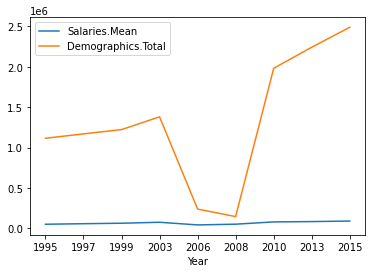

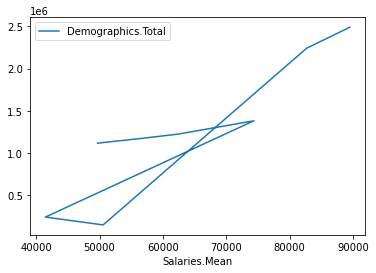

In [51]:
import sklearn
import sklearn.linear_model

data_set_new= mean_biological[["Salaries.Mean", "Year", "Demographics.Total"]]
data_set_new = mean_biological.set_index(mean_biological["Year"])[["Salaries.Mean", "Demographics.Total"]]
data_set_new.plot()
print("dataset-new",data_set_new)
xs = mean_biological['Demographics.Total']
ys = mean_biological['Salaries.Mean']

# Reshape data for X
xs_reshape = np.array(xs).reshape(-1, 1)
model = sklearn.linear_model.LinearRegression()
model.fit(xs_reshape, ys)

model.coef_
#model.intercept_ # what is this?
data_set_new.plot(x=0,y=1) # x= first column and y=second column in dataframe
print("Gender:", xs)
print("Salary:", ys)

#data.plot.scatter(x = 1, y = 3)


In [50]:
# Use the model to predict
predicted = model.predict(xs_reshape)
salary_per_year = model.predict([[0]])
print('Every year the salary will increase/decrease by {}'.format(salary_per_year[0]))
predicted

Every year the salary will increase/decrease by 39566.24555275357


array([60326.43562184, 61446.29053482, 62420.54217299, 65373.79251232,
       44503.70823322, 42675.7303322 , 78593.66111912, 82304.19994517,
       87984.99952832])